In [ ]:
%pylab

In [11]:
%%time
from time import time

# create an n by n array
n=1000
a=ones([n,n])
# print (a)

# scan column by column
s=0
for i in range(n): 
    s+=sum(a[:,i])
    
# row by row
for i in range(n):
    s+=sum(a[i,:])

CPU times: user 10 ms, sys: 0 ns, total: 10 ms
Wall time: 8.94 ms


In [14]:
def sample_run_times(T,k=10):
    all_times=[]
    for e in T:
        n=int(10**e)
        #print('\r',n)
        a=np.ones([n,n])
        times=[]

        for i in range(k):    
            t0=time()
            s=0;
            for i in range(n):
                s+=sum(a[:,i])
            t1=time()
            s=0;
            for i in range(n):
                s+=sum(a[i,:])
            t2=time()
            times.append({'row minor':t1-t0,'row major':t2-t1})
        all_times.append({'n':n,'times':times})
    return all_times


sample_run_times([1,2],k=1)

[{'n': 10,
  'times': [{'row major': 3.814697265625e-05,
    'row minor': 9.250640869140625e-05}]},
 {'n': 100,
  'times': [{'row major': 0.0003180503845214844,
    'row minor': 0.00037479400634765625}]}]

In [15]:
import numpy as np

k=100
all_times=sample_run_times(np.arange(1,3.001,0.01),k=k)
_n=[]
_row_major_mean=[]
_row_major_std=[]
_row_major_min=[]
_row_major_max=[]

_row_minor_mean=[]
_row_minor_std=[]
_row_minor_min=[]
_row_minor_max=[]


for times in all_times:
    _n.append(times['n'])
    row_major=[a['row major'] for a in times['times']]
    row_minor=[a['row minor'] for a in times['times']]
    _row_major_mean.append(np.mean(row_major))
    _row_major_std.append(np.std(row_major))
    _row_major_min.append(np.min(row_major))
    _row_major_max.append(np.max(row_major))

    _row_minor_mean.append(np.mean(row_minor))
    _row_minor_std.append(np.std(row_minor))
    _row_minor_min.append(np.min(row_minor))
    _row_minor_max.append(np.max(row_minor))

# convert lists to arrays
_row_major_mean=np.array(_row_major_mean)
_row_major_std=np.array(_row_major_std)
_row_minor_mean=np.array(_row_minor_mean)
_row_minor_std=np.array(_row_minor_std)

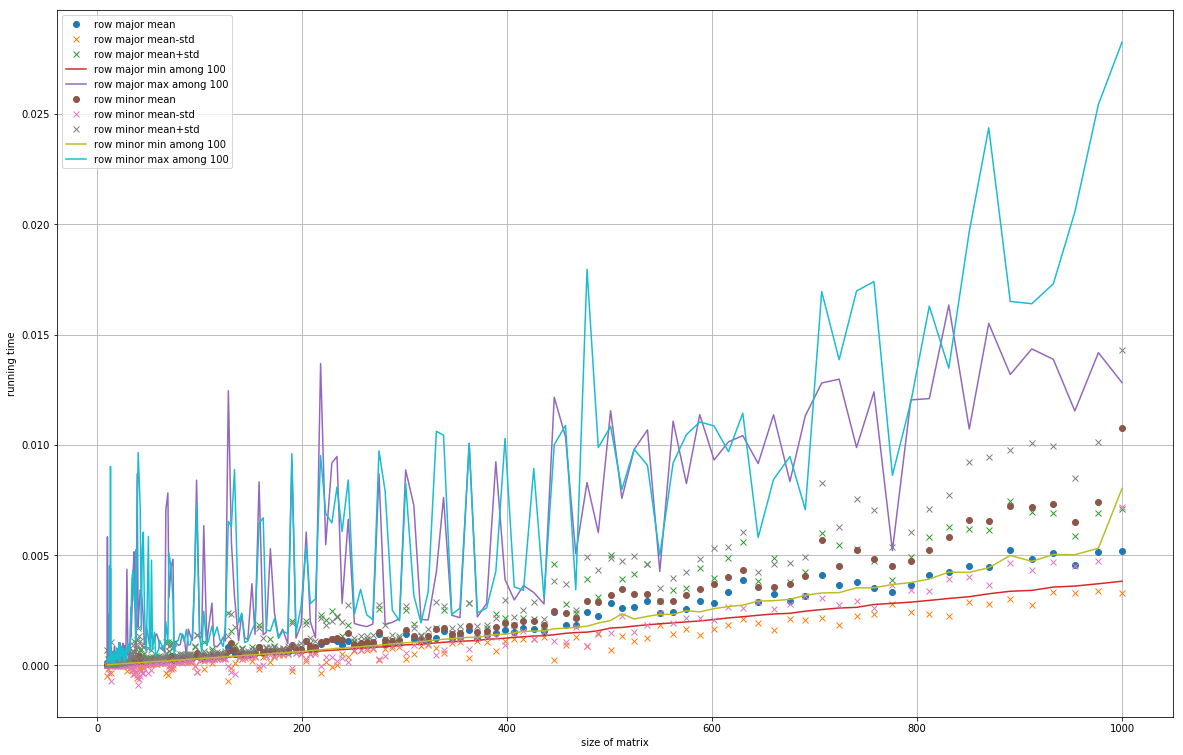

In [16]:
figure(figsize=(20,13))
plot(_n,_row_major_mean,'o',label='row major mean')
plot(_n,_row_major_mean-_row_major_std,'x',label='row major mean-std')
plot(_n,_row_major_mean+_row_major_std,'x',label='row major mean+std')
plot(_n,_row_major_min,label='row major min among %d'%k)
plot(_n,_row_major_max,label='row major max among %d'%k)
plot(_n,_row_minor_mean,'o',label='row minor mean')
plot(_n,_row_minor_mean-_row_minor_std,'x',label='row minor mean-std')
plot(_n,_row_minor_mean+_row_minor_std,'x',label='row minor mean+std')
plot(_n,_row_minor_min,label='row minor min among %d'%k)
plot(_n,_row_minor_max,label='row minor max among %d'%k)
xlabel('size of matrix')
ylabel('running time')
legend()
grid()

### Summary

1. Scan by column is slower than scan by row and the difference increases with the size.
2. scan by row increases linearly and has very little random fluctuations.
3. Scan by column increases linearly with one constant until about `n=430` and then increases with a higher constant.
4. Scan by column has large fluctatuations around the mean.